In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from tqdm.notebook import tqdm
from datetime import datetime
from random import choice
from glob import glob
## gmplot - dependency to create geoplot
import gmplot

In [2]:
resolution = 10


In [57]:
files = glob("input/feed/bus_movements_2019_07_07.db")
db = sqlite3.connect(files[0])
speed_data = db.execute("Select speed, timestamp, route_id, trip_id, lat, lng from vehicle_feed")

In [4]:
to_radian = lambda x : x/57.29577951

def haversine_dist(lat1, lon1, lat2, lon2):
    lat1 = to_radian(lat1)
    lon = to_radian(lon1) - to_radian(lon2)
    lat2 = to_radian(lat2)
    a = np.sin((lat1-lat2) / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon / 2)**2
    c = 2*np.arcsin(np.sqrt(a))

    return 6373.0 * c * 1000

In [58]:
tree = {}
count = 0
for e in tqdm(speed_data):
    if int(e[2]) not in tree:
        tree[int(e[2])]  = {}
    if e[3] not in tree[int(e[2])]:
        tree[int(e[2])][e[3]]  = {}
    
    if int(e[1]) not in tree[int(e[2])][e[3]]:
        tree[int(e[2])][e[3]][int(e[1])] = np.array([e[0], e[-2], e[-1]]).astype(float)

In [6]:
stops_data = dict()
i = 0
for e in open("input/static/stops.txt").read().split("\n")[1:-1]:
    split = e.split(",")
    stops_data[int(split[0])] = (float(split[-2]), float(split[-1]), split[0], split[1], i)
    i+=1
# stops_data = np.array([e.split(",")[-2:] for e in  open("input/stops.txt").read().split("\n")[1:-1]]).astype(np.float32)

In [7]:
trips_data = dict()
for e in open("input/static/stop_times.txt").read().split("\n")[1:-1]:
    split = e.split(",")
    trip_id = split[0]
    if trip_id not in trips_data:
        trips_data[trip_id] = set()
    trips_data[trip_id].add(int(split[3]))

In [8]:
routes_data = dict()
for e in open("input/static/trips.txt").read().split("\n")[1:-1]:
    split = e.split(",")
    route_id = int(split[0])
    trip_id = split[2]
    if route_id not in routes_data:
        routes_data[route_id] = set()
        routes_data[route_id] |= trips_data[trip_id]

In [9]:
matrix = np.zeros([100 * 100, 144])

In [10]:
stops_used = {}

In [11]:
output = {}

In [70]:
tree_keys = list(tree.keys())

In [84]:
for route_id in tqdm(tree_keys[2:]):
    route_stops = list(routes_data[route_id])
    for j in tree[route_id]:
        if j in ["2806", "12272"]:
            continue
        stops_order = []
        stops_visited = set()
        for ts in tree[route_id][j]:
            k = tree[route_id][j][ts]
            distances = [haversine_dist(k[1], k[2], stops_data[e][0], stops_data[e][1]) for e in route_stops]
            least_far = np.argsort(distances)[0]
            if distances[least_far] < 50:
                if route_stops[least_far] in stops_visited:
                    assert stops_order[-1][0] == route_stops[least_far]
                    stops_order[-1][1].append(ts)
                else:
                    stops_visited.add(route_stops[least_far])
                    stops_order.append((route_stops[least_far], [ts]))

AssertionError: 

In [85]:
keys_sorted = sorted(tree[route_id][j].keys())

In [86]:
cd = []
for e in keys_sorted:
    cd.append(tree[route_id][j][e][1:])

In [87]:
cd = np.array(cd)

In [88]:
gmap3 = gmplot.GoogleMapPlotter(lat = cd[0][0], lng = cd[0][1], zoom=15)
gmap3.marker(cd[0][0], cd[0][1], color="green")
gmap3.marker(cd[-1][0], cd[-1][1], color="red")

gmap3.plot(cd[:, 0], cd[:, 1],  
           'cornflowerblue', edge_width = 2.5) 
gmap3.draw( "output/map.html" )

In [89]:
j

'4618'

In [90]:
route_stops[least_far]

1073

In [34]:
stops_data[2916]

(28.6631, 77.3205, '2916', 'Ram Prastha Temple', 2738)

In [ ]:
tree[]

In [57]:
sorted_distances = sorted(distances, key=lambda e:e[-1])

In [27]:
dist = [haversine_dist(lat1, lon1, e[0], e[1]) for e in stops_data]

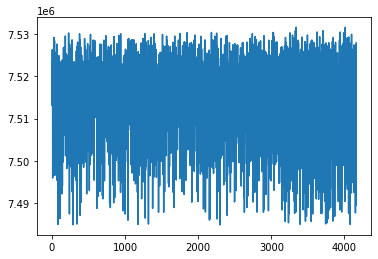

In [28]:
plt.plot(dist)

In [60]:
sorted_distances[:100]

[(24, 891, 2.0105548598760845),
 (3137, 3162, 2.36703212660892),
 (2128, 3733, 2.4664311231056617),
 (2299, 2523, 2.472864219542169),
 (751, 814, 2.4738626505492096),
 (2234, 2824, 2.514644506868477),
 (201, 3215, 2.515723740306358),
 (6, 3910, 2.5162722374378585),
 (2118, 3219, 2.5620123210445023),
 (3491, 3927, 2.6979214721388045),
 (741, 2795, 2.948388097908186),
 (3725, 4116, 3.219059537581496),
 (1845, 3756, 3.2237793610856404),
 (323, 3262, 3.231562027035296),
 (3646, 3966, 3.266288794642316),
 (1709, 2703, 3.5181832665067305),
 (3113, 4117, 3.5647113229837015),
 (1507, 2628, 3.577971737558319),
 (2516, 3053, 3.6705844969393553),
 (896, 1998, 3.7331668434540304),
 (556, 1646, 3.7381343928125195),
 (880, 1633, 3.742369047137203),
 (603, 707, 3.743656427989036),
 (1780, 2345, 3.745246795432413),
 (249, 2787, 3.7818143302549845),
 (3902, 3957, 3.817679840964198),
 (2192, 2587, 3.821035568295031),
 (1098, 1401, 4.027986136212571),
 (2985, 3628, 4.130021490316059),
 (18, 369, 4.387590

In [132]:
sorted_distances = sorted(distances, key=lambda e:e[-1])

In [150]:
for ind in range(len(sorted_distances)):
    if sorted_distances[ind][-1]>30:
        break

In [151]:
choose = sorted_distances[ind]
gmap3 = gmplot.GoogleMapPlotter(lat = stops_data[choose[1]][0], lng = stops_data[choose[1]][1], zoom=50)

gmap3.marker(stops_data[choose[1]][0], stops_data[choose[1]][1])
gmap3.marker(stops_data[choose[2]][0], stops_data[choose[2]][1])

gmap3.draw( "output/stops.html" )
ind += 1

In [127]:
print(stops_data[21])

(28.6803, 77.0893, '21', 'Udyog Nagar')


In [135]:
choose

(261, 1892, 2501, 3.745246795432413)

In [138]:
stops_data[choose[1]]

(28.73081667, 77.03966667, '1892', 'Karala School')

In [139]:
stops_data[choose[2]]

(28.730783, 77.03966700000001, '2501', 'Karala Pathsala Jain Mandir')